# Preprocesamiento de datos

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA

sns.set()

In [16]:
datos = pd.DataFrame(data={
    "col1": np.random.normal(10,4,500),
    "col2": np.random.uniform(-75,60,500),
    "col3": np.random.standard_normal(500)
})
datos.head()

,col1,col2,col3
0,8.078022,-28.801496,0.500093
1,10.006087,-14.240788,-0.936704
2,15.692501,45.433583,-0.577814
3,13.151293,-21.941107,0.089827
4,2.449502,-36.348156,-1.104056


## Datos univariables

### Estandarización

Es un tipo de normalización donde a cada observación se le resta la media muestral y luego se le divide por la desviación estándar.

$$
x_{ij} := \frac{x_{ij}-\hat{\mu}_j}{\hat{\sigma}_j}
$$

La idea es que, si la distribución de los datos de la columna $j$ es aproximadamente estándar, entonces la distribución de dicha columna después de la estandarización sea aproximadamente normal estándar.

Este tipo de normalización típicamente resulta en valores aproximadamente en el rango $(-3,3)$.

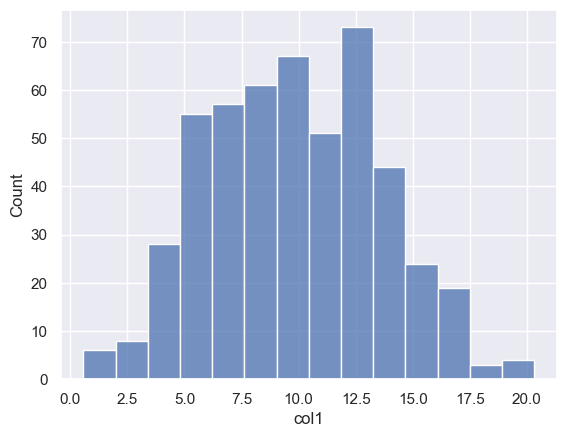

In [17]:
sns.histplot(data=datos, x="col1")
plt.show()

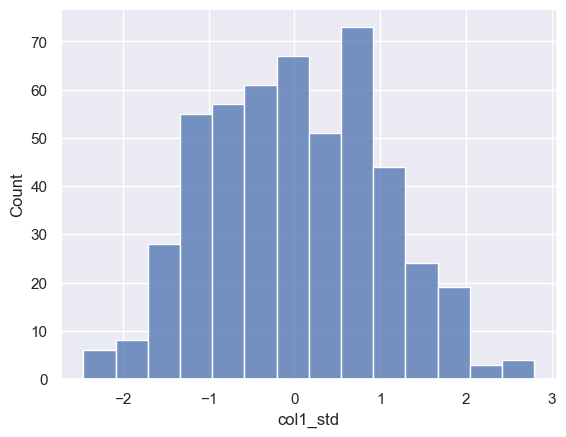

,col1,col2,col3,col1_std
0,8.078022,-28.801496,0.500093,-0.461208
1,10.006087,-14.240788,-0.936704,0.051716
2,15.692501,45.433583,-0.577814,1.564475
3,13.151293,-21.941107,0.089827,0.888436
4,2.449502,-36.348156,-1.104056,-1.958566


In [18]:
estandarizador = StandardScaler()
estandarizador.fit(datos[["col1"]])
datos["col1_std"] = estandarizador.transform(datos[["col1"]])

sns.histplot(data=datos, x="col1_std")
plt.show()
datos.head()

### Normalización Min-Max

Este tipo de normalización mapea los valores al intervalo $[0,1]$ de la siguiente manera:

$$
\frac{x_{ij} - \min_{j}}{\max_{j}-\min_{j}}
$$

La mayor ventaja de este enfoque es que los valores son mapeados al intervalo específico $[0,1]$. Esto puede se útil en algunas aplicaciones donde la no-negatividad o acotación es supuesta. Sin embargo, la estandarización es un enfoque más sustentado en la estadística.

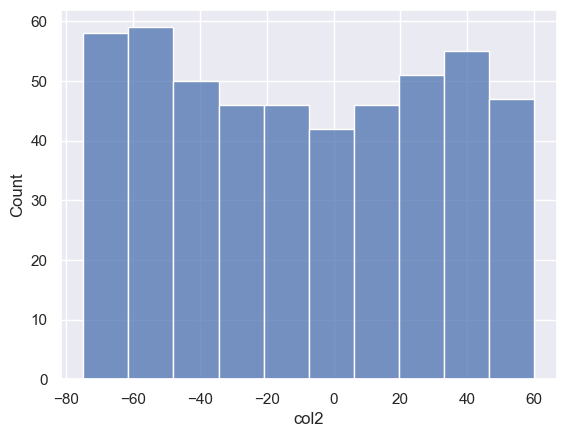

In [19]:
sns.histplot(data=datos, x="col2")
plt.show()

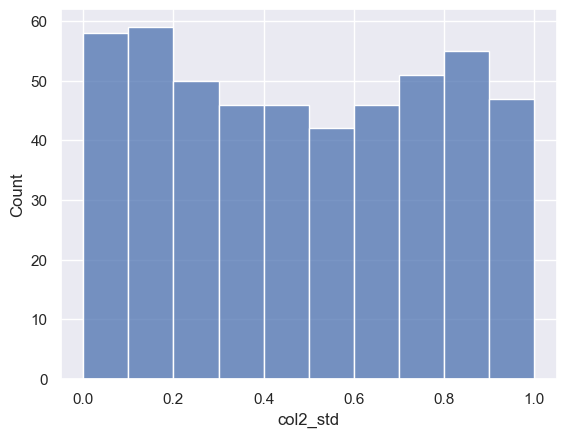

,col1,col2,col3,col1_std,col2_std
0,8.078022,-28.801496,0.500093,-0.461208,0.341205
1,10.006087,-14.240788,-0.936704,0.051716,0.449236
2,15.692501,45.433583,-0.577814,1.564475,0.891983
3,13.151293,-21.941107,0.089827,0.888436,0.392105
4,2.449502,-36.348156,-1.104056,-1.958566,0.285213


In [20]:
normalizador = MinMaxScaler()
normalizador.fit(datos[["col2"]])
datos["col2_std"] = normalizador.transform(datos[["col2"]])

sns.histplot(data=datos, x="col2_std")
plt.show()
datos.head()

## Datos multivariables

### Whitening

Este método de preprocesamiento de datos asume que la distribución de cada una de las columnas sea una distribución normal. Con este método se pretende utilizar el Análisis de Componentes Principales (PCA) para transformar los datos en datos con columnas que tengan covarianza 0, para después dividir cada columna entre su varianza para obtener columnas de varianza 1. Así, se obtiene un conjunto de datos con covarianza 0, varianza 1 en todas las columnas y, si se grafica, aproximadamente esférico.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


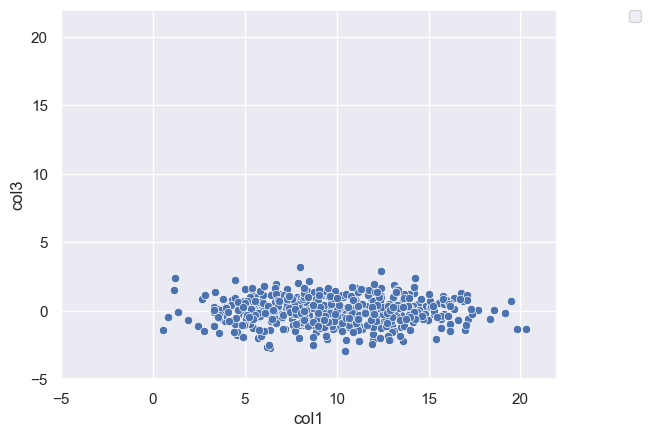

In [28]:
sns.scatterplot(datos.iloc[:,[0,2]], x="col1", y="col3")
plt.xlim([-5,22])
plt.ylim([-5,22])
plt.legend(bbox_to_anchor=(1.17, 1), loc='upper right', borderaxespad=0) #  
plt.show()

In [30]:
D = np.array(datos.iloc[:,[0,2]].copy())
D_c = D - np.array([np.mean(D, axis=0)]*D.shape[0])
pca = PCA(n_components=2)
pca.fit(D_c)
D_new = pca.transform(D_c)
D_new = D_new / np.array([np.std(D_new, axis=0)]*D_new.shape[0])
D_new[:5]

array([[-0.46098592,  0.53504928],
       [ 0.05132975, -0.92862745],
       [ 1.56423739, -0.5729809 ],
       [ 0.88848218,  0.10980618],
       [-1.959018  , -1.08654706]])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


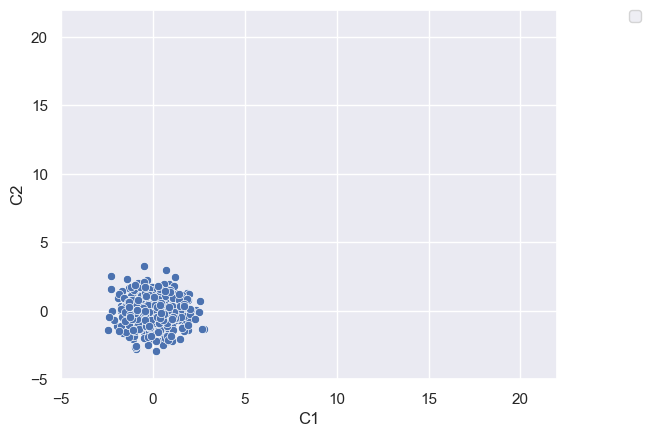

In [31]:
df = pd.DataFrame(data={
    "C1": D_new[:,0],
    "C2": D_new[:,1]
})

sns.scatterplot(df, x="C1", y="C2")
plt.xlim([-5,22])
plt.ylim([-5,22])
plt.legend(bbox_to_anchor=(1.17, 1), loc='upper right', borderaxespad=0) #  
plt.show()